# Option Analysis
This notebook analyzes the behavior of **put** options according to expiration time. Option price and the most common greeks are evaluated. Analysis is done for sets of distances of the strike price from the underlying, subdividing plots in three groups: OTM, ATM, ITM.

## Notation
- `S` is the **underlying price**
- `K` is the **strike price**
- `r` is the **risk-free** rate, can be set to `0`
- `T` is the **time** in years
- `sigma` is the **volatility**

## Variables

In [59]:
r = 0.00
S = 5000
K = 4600
T = 30/365
sigma = 0.15
option_type="p"

figure_folder = "figures"

## Import and Check Functions

In [60]:
import numpy as np
import os
from py_vollib.black_scholes import black_scholes 
from py_vollib.black_scholes.greeks.analytical import delta, gamma, vega, theta
from matplotlib import pyplot as plt

print("Option Price: ", black_scholes(option_type, S, K, T, r, sigma))
print("Delta: ", delta(option_type, S, K, T, r, sigma))
print("Gamma: ", gamma(option_type, S, K, T, r, sigma))
print("Vega: ", vega(option_type, S, K, T, r, sigma))
print("Theta: ", theta(option_type, S, K, T, r, sigma))


Option Price:  2.0588387369840278
Delta:  -0.024971968810728495
Gamma:  0.0002715588315074376
Vega:  0.8369963984818282
Theta:  -0.20924909962045704


## Utilities

### Make all Strike Distances
Distances in % are taken from -10% to -3%.

In [61]:
def compute_strike_from_distance(S, d):
    return S*(1+d/100)

otm_distances = np.arange(-3, -11, -1) # in percentage
otm_strike_array = [compute_strike_from_distance(S, d) for d in otm_distances]

otm_strike_distances = np.empty([len(otm_distances), 2], dtype=np.int16)
otm_strike_distances[:, 0] = otm_distances
otm_strike_distances[:, 1] = otm_strike_array

print(f"Underlying OTM values (stock at {S}):\n")
print(otm_strike_distances)

atm_distances = [-0.5, -0.25, 0.25, 0.5] # in percentage
atm_strike_array = [compute_strike_from_distance(S, d) for d in atm_distances]

atm_strike_distances = np.empty([len(atm_distances), 2])
atm_strike_distances[:, 0] = atm_distances
atm_strike_distances[:, 1] = atm_strike_array

print(f"\n\nUnderlying ATM values (stock at {S}):\n")
print(atm_strike_distances)

itm_distances = np.arange(1, 4) # in percentage
itm_strike_array = [compute_strike_from_distance(S, d) for d in itm_distances]

itm_strike_distances = np.empty([len(itm_distances), 2], dtype=np.int16)
itm_strike_distances[:, 0] = itm_distances
itm_strike_distances[:, 1] = itm_strike_array

print(f"\n\nUnderlying ITM values (stock at {S}):\n")
print(itm_strike_distances)

Underlying OTM values (stock at 5000):

[[  -3 4850]
 [  -4 4800]
 [  -5 4750]
 [  -6 4700]
 [  -7 4650]
 [  -8 4600]
 [  -9 4550]
 [ -10 4500]]


Underlying ATM values (stock at 5000):

[[-5.0000e-01  4.9750e+03]
 [-2.5000e-01  4.9875e+03]
 [ 2.5000e-01  5.0125e+03]
 [ 5.0000e-01  5.0250e+03]]


Underlying ITM values (stock at 5000):

[[   1 5050]
 [   2 5100]
 [   3 5150]]


### Make Time Array for each day of the month
Time is computed on a yearly scale to satisfy balck&sholes formula requirements

In [62]:
days_to_expiration = np.arange(0, 31)
days_to_expiration_bs = [t/365 for t in days_to_expiration]

print(days_to_expiration)
print(days_to_expiration_bs)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30]
[0.0, 0.0027397260273972603, 0.005479452054794521, 0.00821917808219178, 0.010958904109589041, 0.0136986301369863, 0.01643835616438356, 0.019178082191780823, 0.021917808219178082, 0.024657534246575342, 0.0273972602739726, 0.030136986301369864, 0.03287671232876712, 0.03561643835616438, 0.038356164383561646, 0.0410958904109589, 0.043835616438356165, 0.04657534246575343, 0.049315068493150684, 0.052054794520547946, 0.0547945205479452, 0.057534246575342465, 0.06027397260273973, 0.06301369863013699, 0.06575342465753424, 0.0684931506849315, 0.07123287671232877, 0.07397260273972603, 0.07671232876712329, 0.07945205479452055, 0.0821917808219178]


## Computation and Plot Function


In [63]:
def compute_and_plot_data(f, distances, ax, title, y_label):

    for distance in distances:
        d = distance[0]
        K = distance[1]
        price = [f(option_type, S, K, T, r, sigma) for T in days_to_expiration_bs]
        ax.plot(days_to_expiration, price, label=f'Distance {d}% ({K})')
        ax.set_title(title)
        
    ax.invert_xaxis()
    lgd = ax.legend(bbox_to_anchor=(1, 1), loc='upper left')
    ax.grid(axis="y")
    ax.set(xlabel='Days To Expiration', ylabel=y_label)
    ax.label_outer()

    return lgd

def makeChart(f, y_label, sup_title, filepath):
    fig, (axOTM,axATM, axITM) = plt.subplots(3, figsize=(10,15))

    lgdOTM = compute_and_plot_data(f, otm_strike_distances, axOTM, "OTM", y_label)

    lgdATM = compute_and_plot_data(f, atm_strike_distances, axATM, "ATM", y_label)

    lgdITM = compute_and_plot_data(f, itm_strike_distances, axITM, "ITM", y_label)

    sup = fig.suptitle(sup_title)

    plt.savefig(os.path.join(figure_folder,filepath), bbox_extra_artists=(lgdOTM,lgdATM,lgdITM, sup), bbox_inches='tight')

## Option Price Analysis
This analysis highlights the behavior over time of the option price according to the distance from strike price.

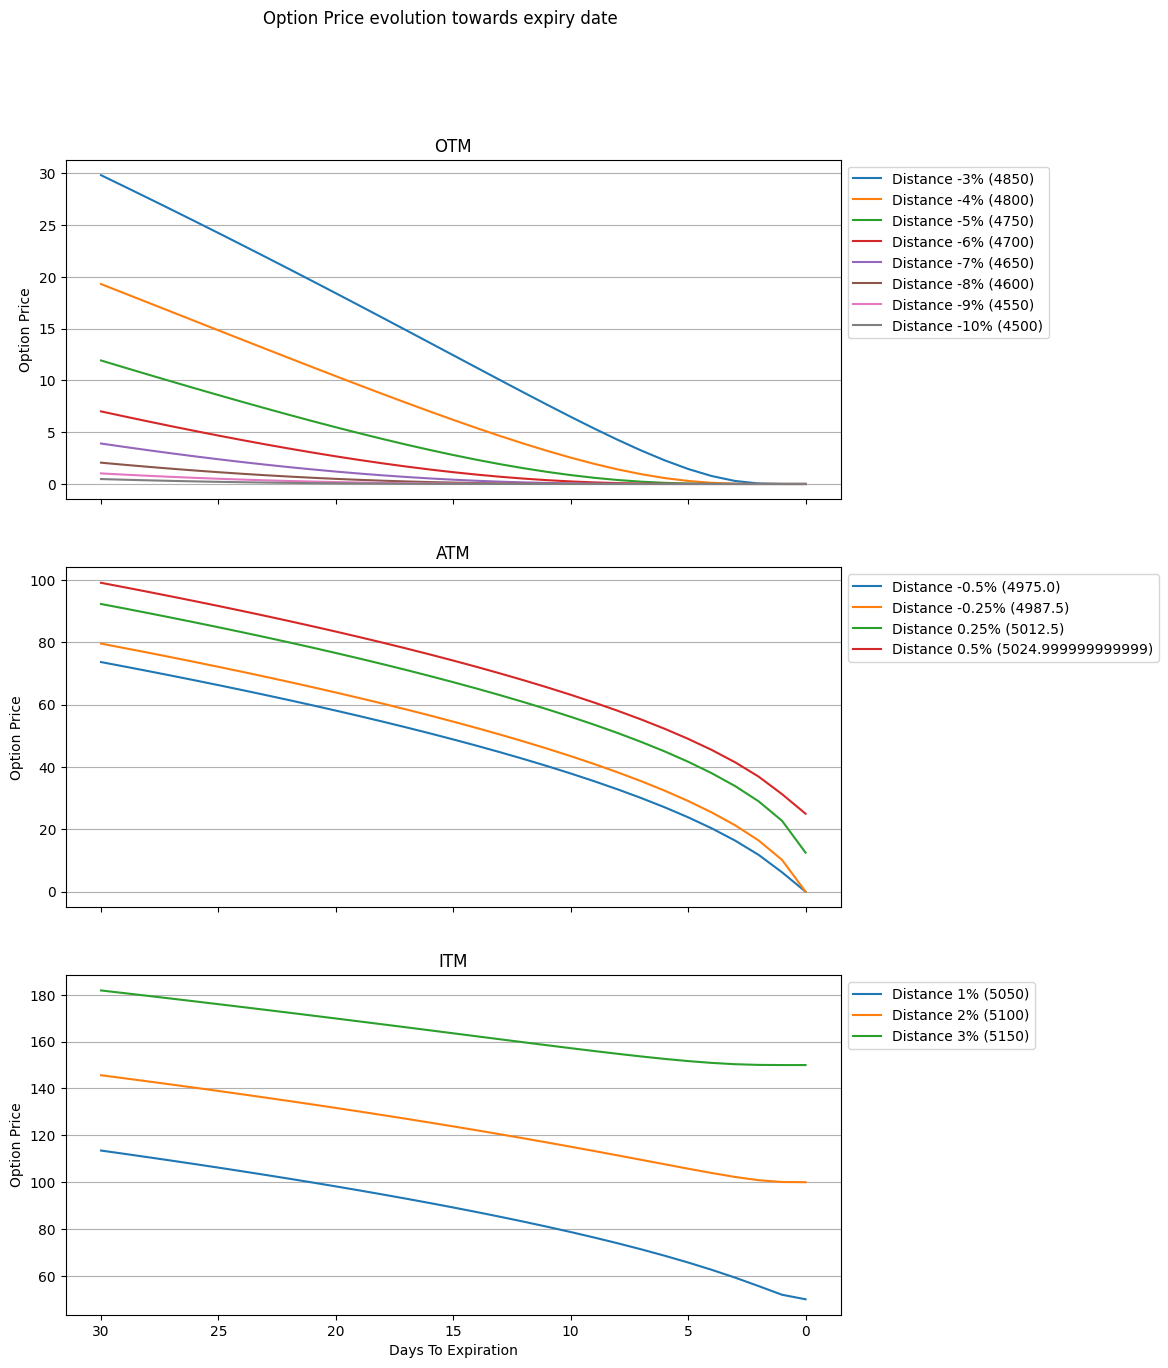

In [64]:
makeChart(black_scholes, "Option Price", "Option Price evolution towards expiry date", "option_price.pdf")

## Delta Analysis

/Users/riccardorobertodelucia/dev/options_analysis/env/lib/python3.10/site-packages/py_vollib/ref_python/black_scholes/__init__.py:87: RuntimeWarning: divide by zero encountered in scalar divide
  return numerator / denominator


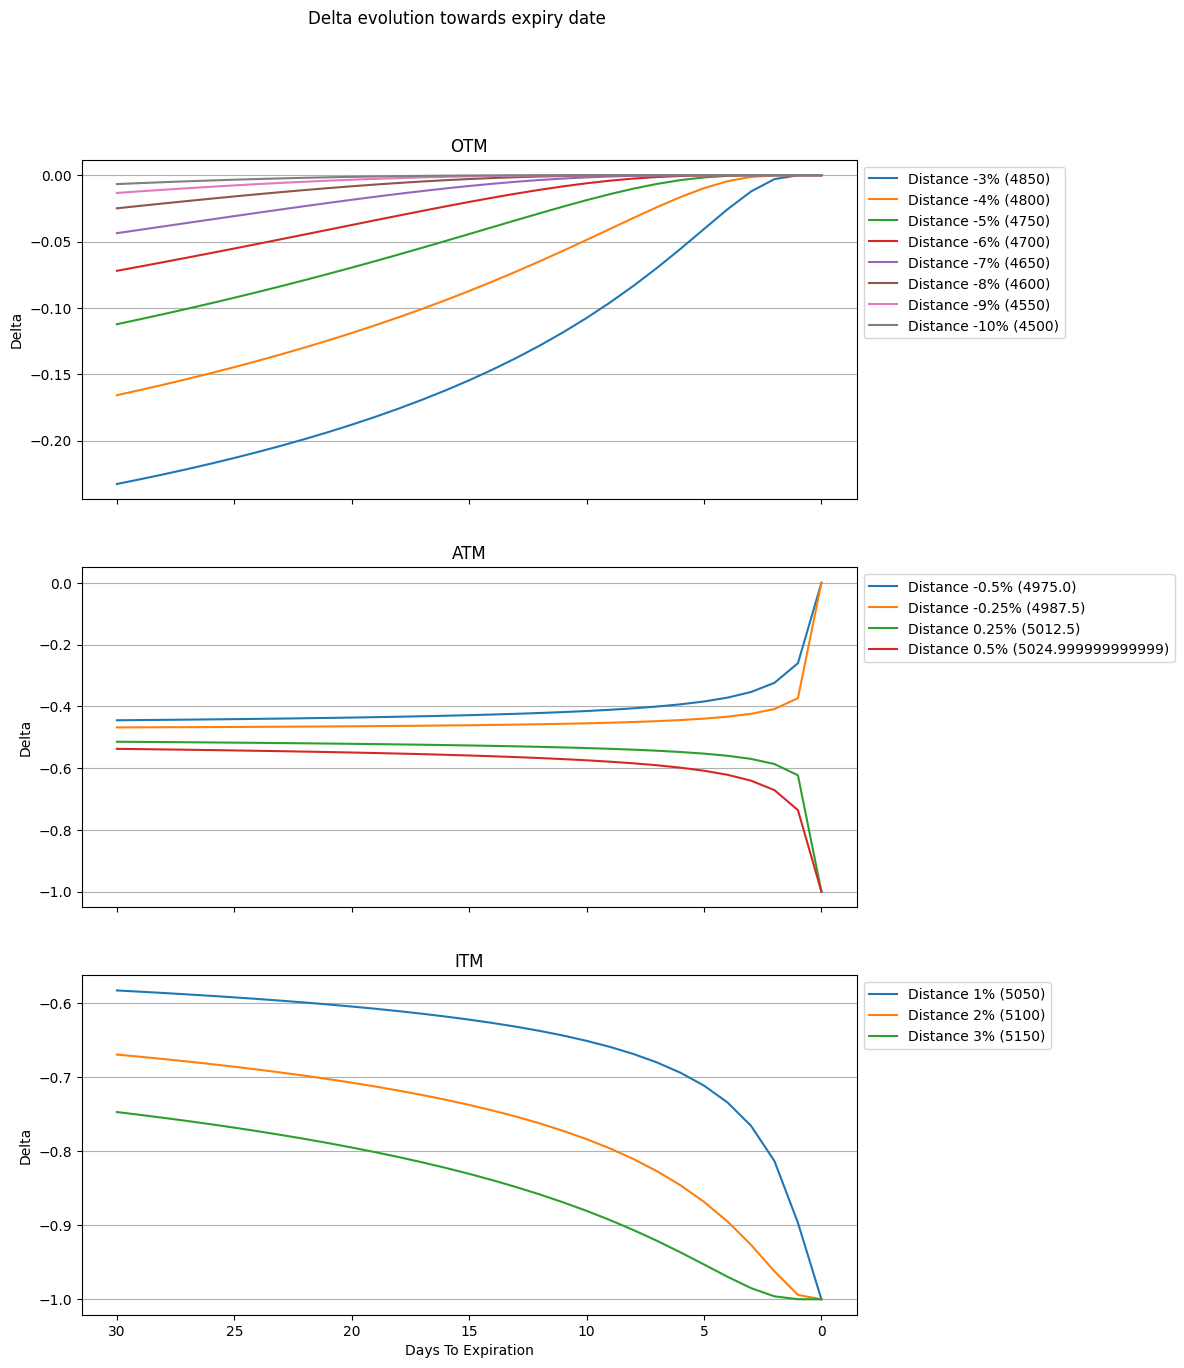

In [65]:
makeChart(delta, "Delta", "Delta evolution towards expiry date", "delta.pdf")

## Gamma Analysis

/Users/riccardorobertodelucia/dev/options_analysis/env/lib/python3.10/site-packages/py_vollib/ref_python/black_scholes/__init__.py:87: RuntimeWarning: divide by zero encountered in scalar divide
  return numerator / denominator
/Users/riccardorobertodelucia/dev/options_analysis/env/lib/python3.10/site-packages/py_vollib/black_scholes/greeks/analytical.py:190: RuntimeWarning: invalid value encountered in scalar divide
  return pdf(d_1)/(S*sigma*numpy.sqrt(t))


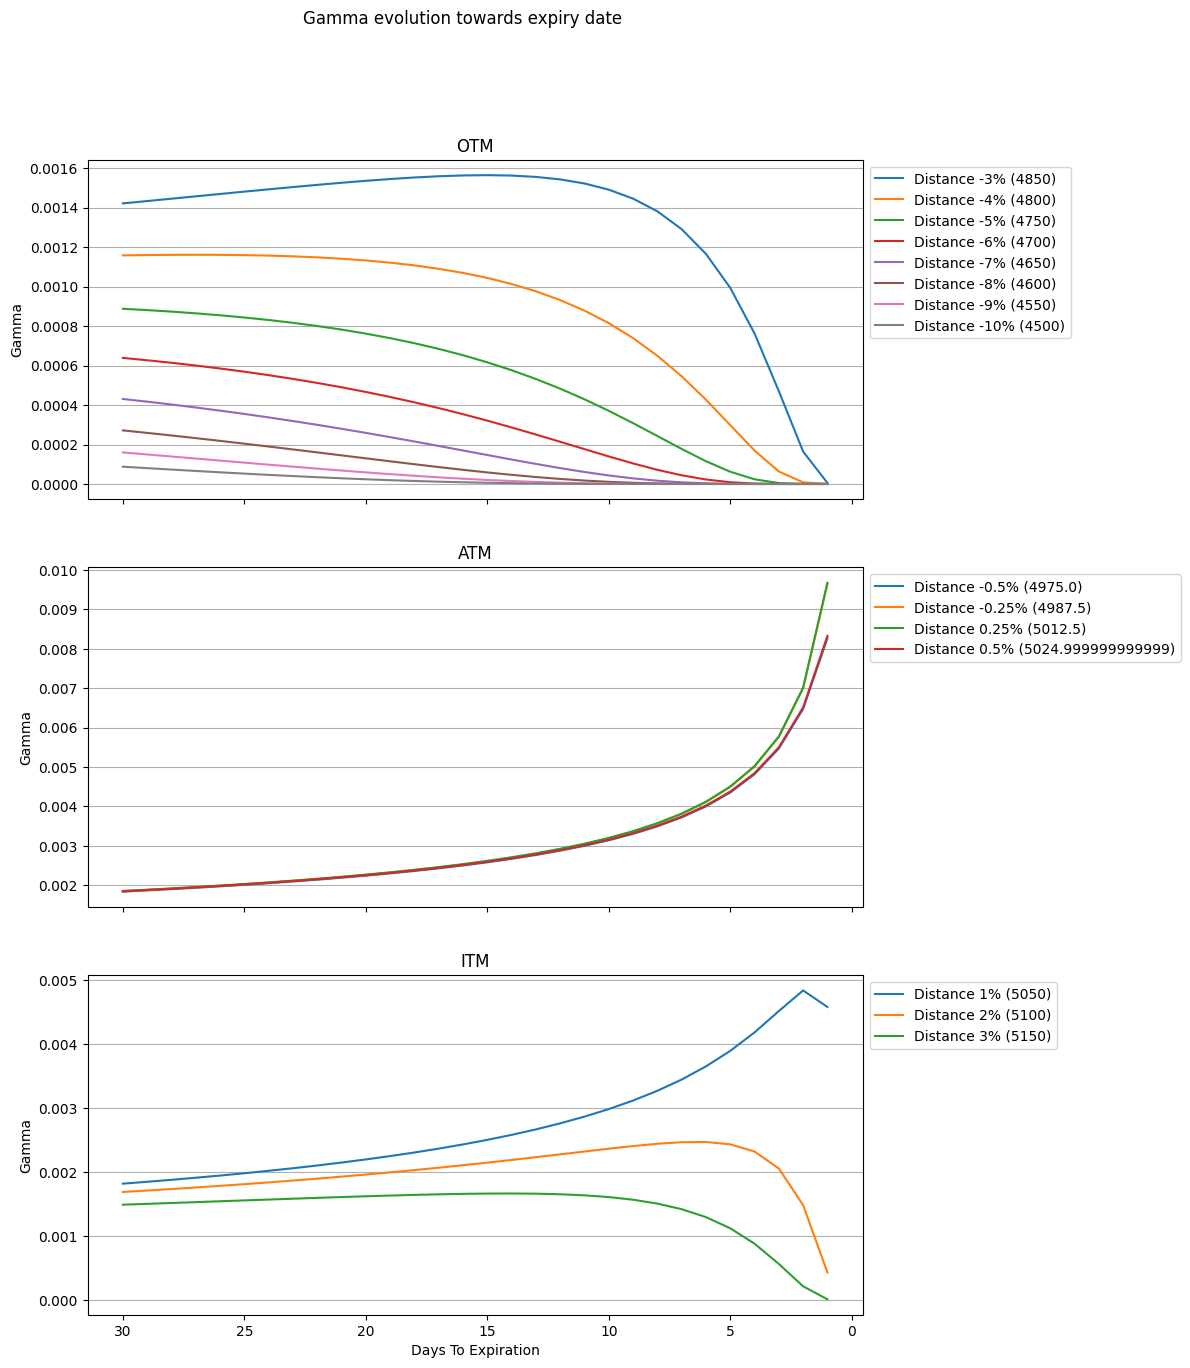

In [66]:
makeChart(gamma, "Gamma", "Gamma evolution towards expiry date", "gamma.pdf")

## Theta Analysis

/Users/riccardorobertodelucia/dev/options_analysis/env/lib/python3.10/site-packages/py_vollib/ref_python/black_scholes/__init__.py:87: RuntimeWarning: divide by zero encountered in scalar divide
  return numerator / denominator
/Users/riccardorobertodelucia/dev/options_analysis/env/lib/python3.10/site-packages/py_vollib/black_scholes/greeks/analytical.py:144: RuntimeWarning: invalid value encountered in scalar divide
  first_term = (-S * pdf(D1) * sigma) / two_sqrt_t


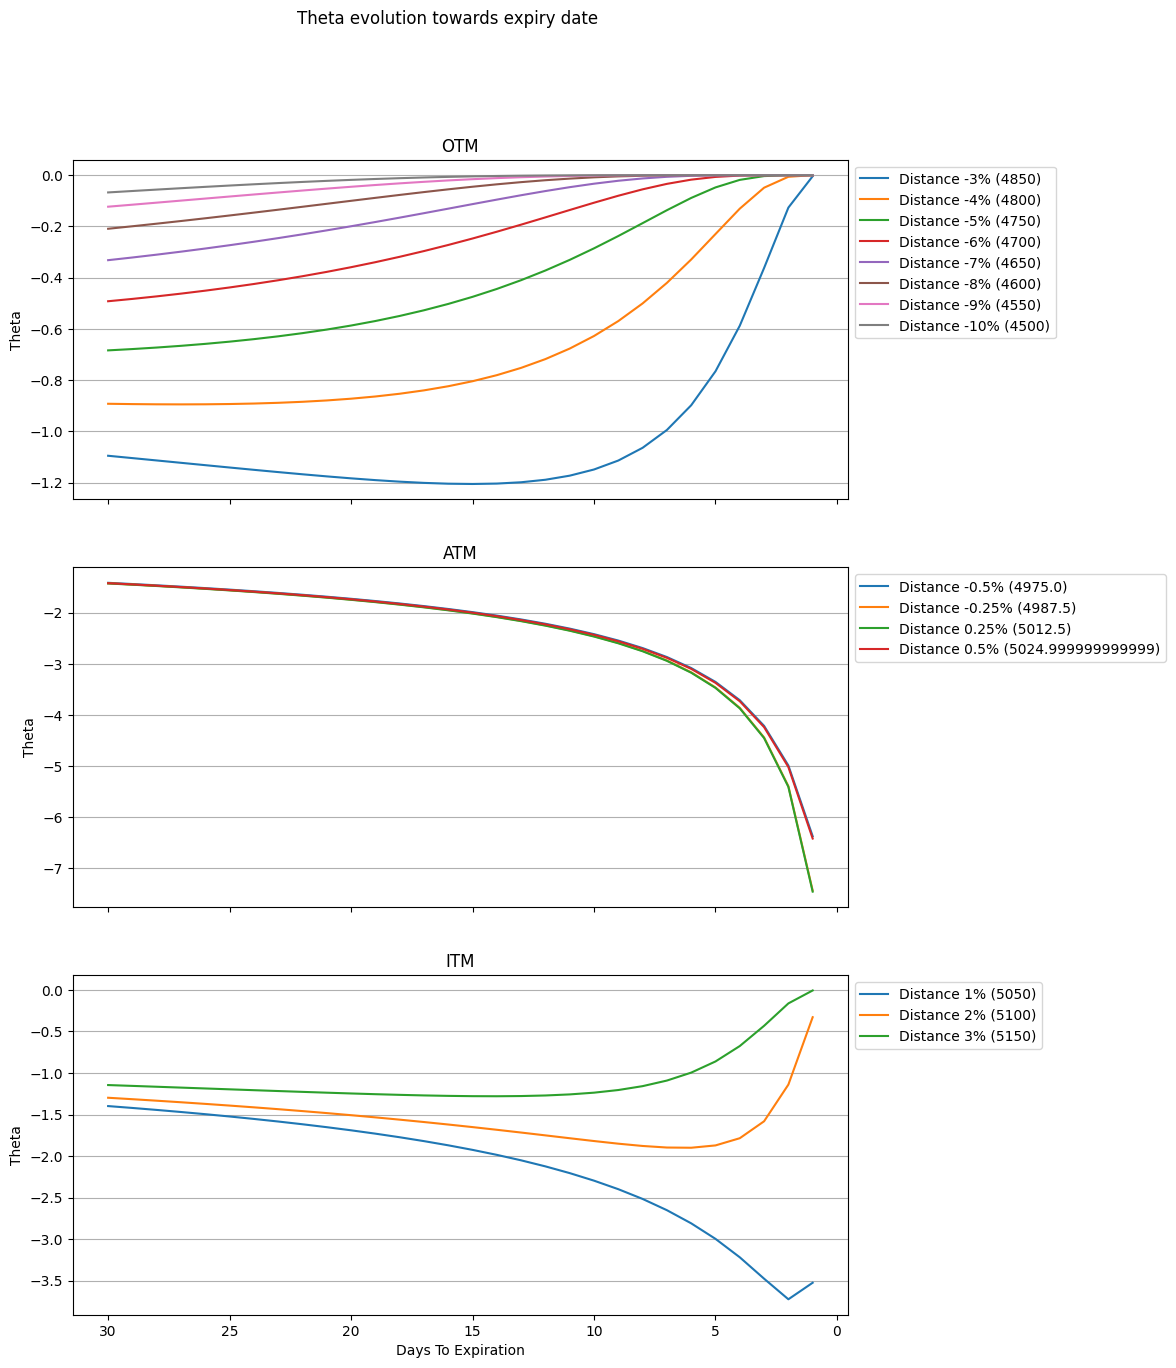

In [67]:
makeChart(theta, "Theta", "Theta evolution towards expiry date", "theta.pdf")

## Vega Evolution

/Users/riccardorobertodelucia/dev/options_analysis/env/lib/python3.10/site-packages/py_vollib/ref_python/black_scholes/__init__.py:87: RuntimeWarning: divide by zero encountered in scalar divide
  return numerator / denominator


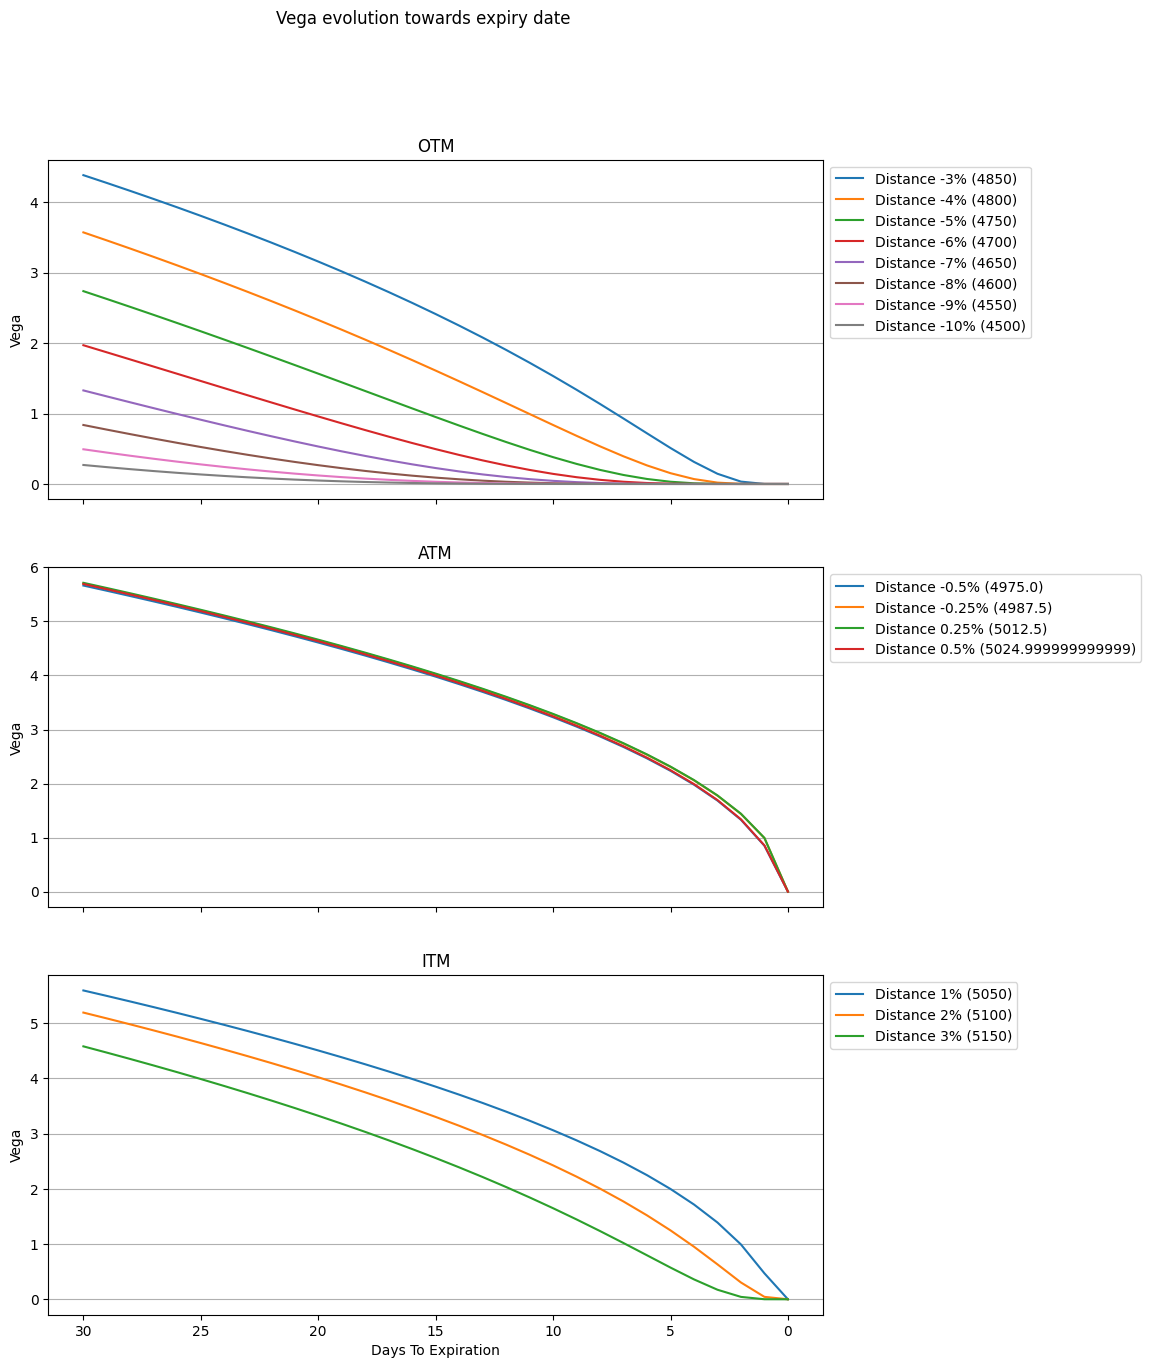

In [68]:
makeChart(vega, "Vega", "Vega evolution towards expiry date", "vega.pdf")